In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Loading the data
data=pd.read_csv('Advertising.csv')

In [3]:
## Call the dataframe and do basic checks
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


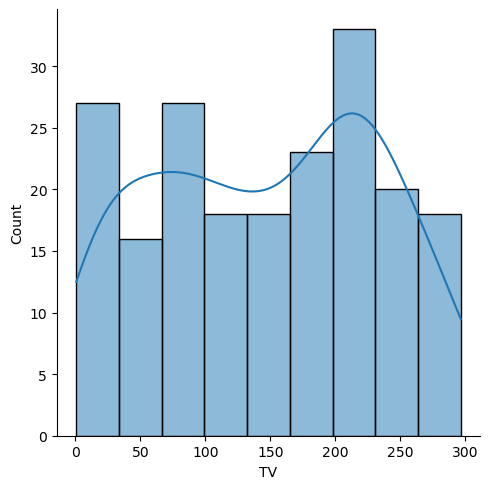

In [5]:
sns.displot(x=data.TV,kde=True)

<Axes: xlabel='TV'>

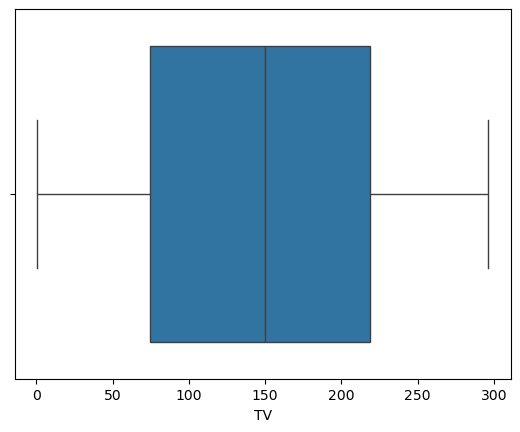

In [6]:
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio', ylabel='Count'>

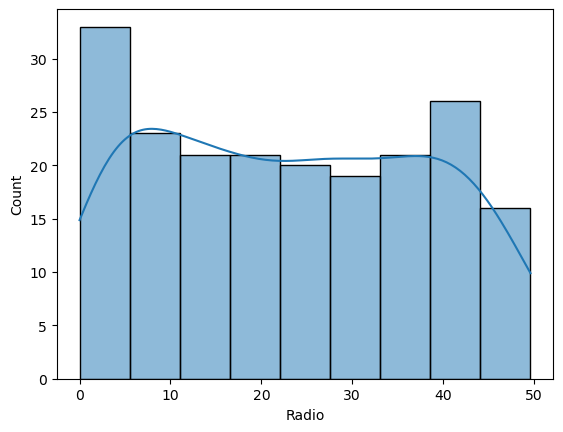

In [7]:
sns.histplot(x=data.Radio,kde=True)

<Axes: xlabel='Radio'>

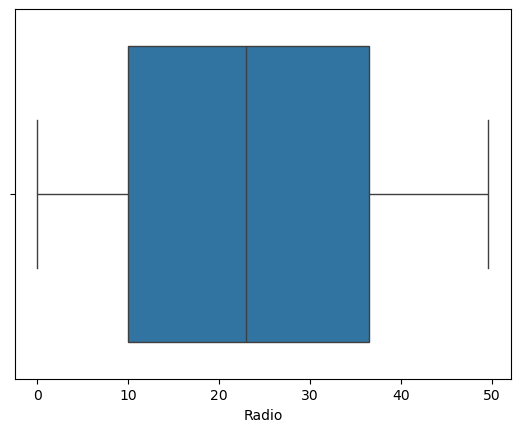

In [8]:
sns.boxplot(x='Radio',data=data)

<Axes: xlabel='Newspaper', ylabel='Count'>

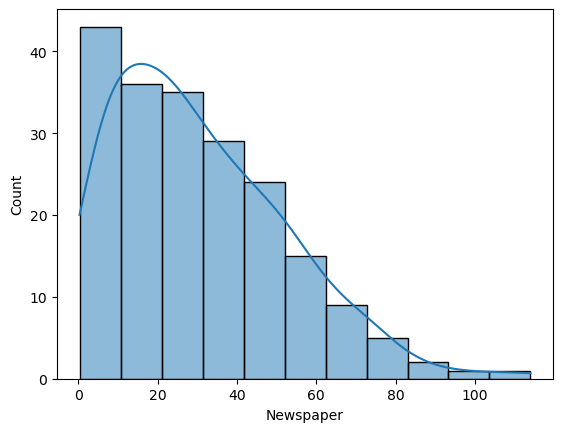

In [9]:
sns.histplot(x=data.Newspaper,kde=True)

<Axes: xlabel='Newspaper'>

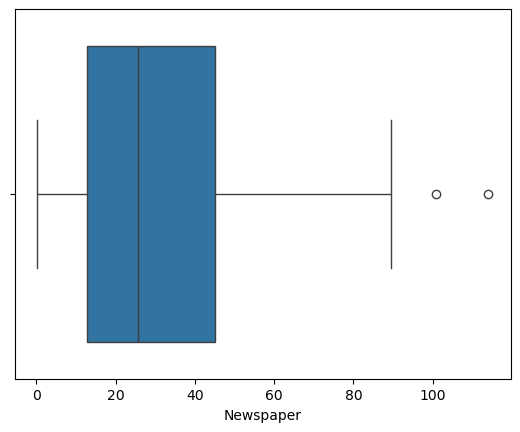

In [10]:
sns.boxplot(x='Newspaper',data=data)

In [11]:
data.Newspaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

In [12]:
# IQR
Q1 = np.percentile(data['Newspaper'], 25, method='midpoint')
Q3 = np.percentile(data['Newspaper'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

32.400000000000006


In [13]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(data['Newspaper'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(data['Newspaper'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 93.70000000000002
2
Lower Bound: -35.900000000000006
0


In [19]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Newspaper'] >= upper)[0]
lower_array = np.where(data['Newspaper'] <= lower)[0]
 


In [20]:
upper_array

array([], dtype=int64)

In [21]:
# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

<Axes: xlabel='Newspaper'>

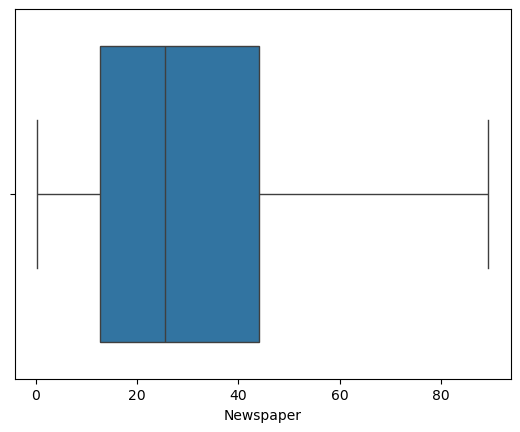

In [15]:
sns.boxplot(x='Newspaper',data=data)

In [16]:
data.Newspaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 198, dtype: float64